In [1]:
import gwpy
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries

In [2]:
time_gps = event_gps("GW190412")
print(time_gps)

1239082262.1


In [3]:
segment = (int(time_gps)-5, int(time_gps) + 5)

In [4]:
ldata = TimeSeries.fetch_open_data('L1', *segment, verbose=True)
hdata = TimeSeries.fetch_open_data('H1', *segment, verbose=True)

Fetched 1 URLs from www.gw-openscience.org for [1239082257 .. 1239082267))
Reading data... [Done]
Fetched 1 URLs from www.gw-openscience.org for [1239082257 .. 1239082267))
Reading data... [Done]


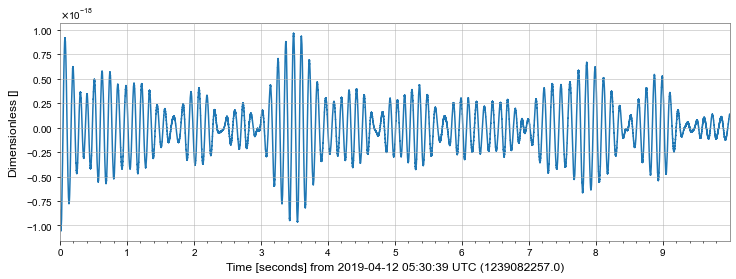

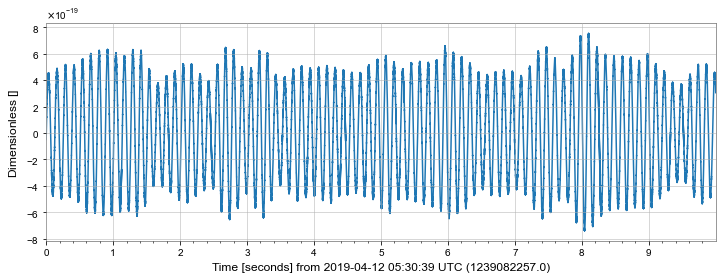

In [5]:
%matplotlib inline
plotl = ldata.plot()
ploth = hdata.plot()

In [6]:
fft = ldata.fft()
print(fft)

FrequencySeries([-1.45894410e-21+0.00000000e+00j,
                 -2.91834926e-21-4.52905657e-23j,
                 -2.91973330e-21-9.06202944e-23j, ...,
                 -2.38723982e-23+4.67871178e-26j,
                 -2.38345362e-23+1.80394058e-26j,
                 -2.38457175e-23+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.1 Hz,
                epoch: 1239082257.0,
                name: Strain,
                channel: None)


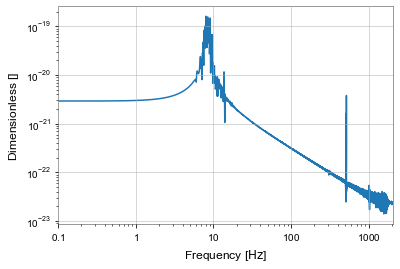

In [7]:
fftplot = fft.abs().plot(xscale="log", yscale="log")
fftplot.show(warn=False)

In [22]:
from scipy.signal import get_window
window = get_window('hann', ldata.size)
lwin = ldata * window

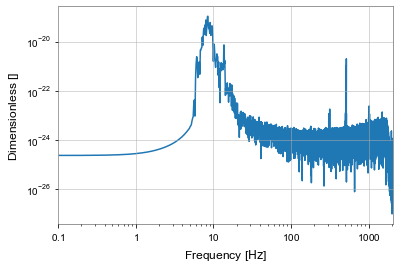

In [23]:
fftamp = lwin.fft().abs()
fftplot = fftamp.plot(xscale="log", yscale="log")
fftplot.show(warn=False)

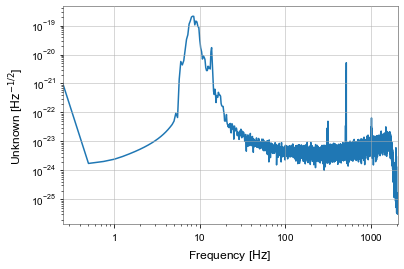

In [24]:
asd = ldata.asd(fftlength=4, method="median")
plot = asd.plot()
plot.show(warn=False)

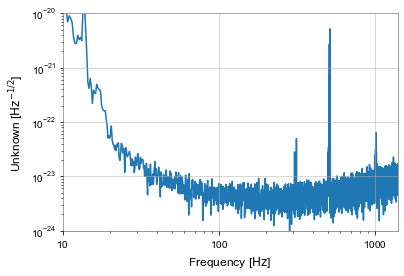

In [25]:
ax = plot.gca()
ax.set_xlim(10,1400)
ax.set_ylim(1e-24,1e-20)
plot

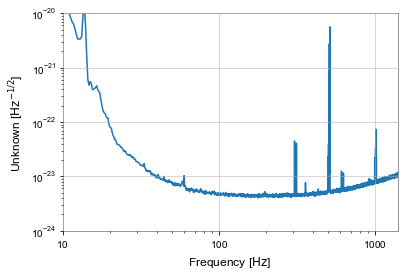

In [26]:
ldata2 = TimeSeries.fetch_open_data('L1', int(time_gps)-512, int(time_gps)+512, cache=True)
lasd2 = ldata2.asd(fftlength=4, method="median")
plot = lasd2.plot()
ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(1e-24, 1e-20)
plot.show(warn=False)

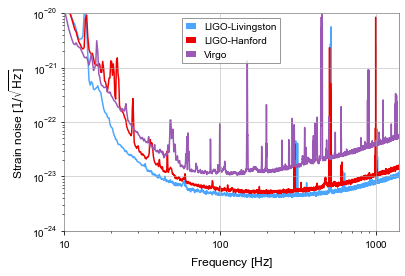

In [27]:
# get Hanford data
hdata2 = TimeSeries.fetch_open_data('H1', int(time_gps)-512, int(time_gps)+512, cache=True)
hasd2 = hdata2.asd(fftlength=4, method="median")

# get Virgo data
vdata2 = TimeSeries.fetch_open_data('V1', int(time_gps)-512, int(time_gps)+512, cache=True)
vasd2 = vdata2.asd(fftlength=4, method="median")

# and plot using standard colours
ax.plot(hasd2, label='LIGO-Hanford', color='gwpy:ligo-hanford')
ax.plot(vasd2, label='Virgo', color='gwpy:virgo')

# update the Livingston line to use standard colour, and have a label
lline = ax.lines[0]
lline.set_color('gwpy:ligo-livingston')  # change colour of Livingston data
lline.set_label('LIGO-Livingston')

ax.set_ylabel(r'Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
ax.legend()
plot